Evaluating different distributions of the titanic dataset and its various columns

<Axes: xlabel='Age', ylabel='Count'>

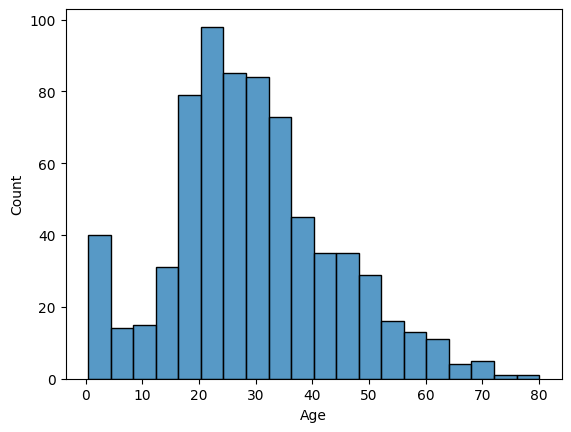

In [12]:
import pandas as pd 
import seaborn as sb 
df = pd.read_csv('Titanic-Dataset.csv') 
sb.histplot(df,x='Age') # Distribution of Age 

<Axes: xlabel='Fare', ylabel='Count'>

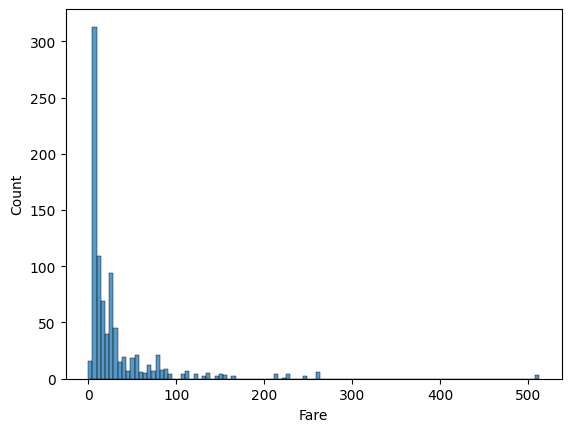

In [2]:
sb.histplot(df,x='Fare') # Distribution of Fare

Distribution refers to the spread of data from minimum to maximum point

In [3]:
# Distribution of the whole titanic dataset in detail 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Age', ylabel='Count'>

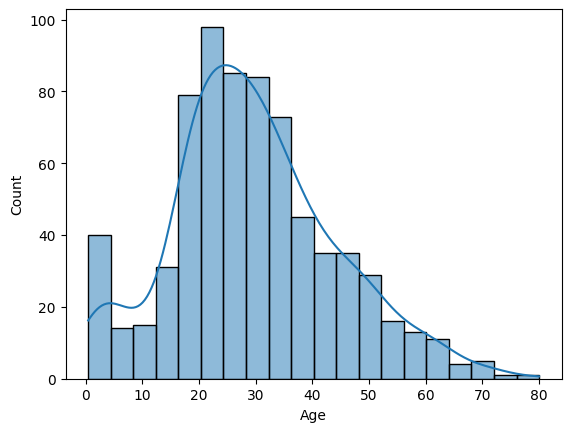

In [3]:
# Presenting the distribution of the Age column 
sb.histplot(df['Age'],kde=True) # kde=True gives a smooth curve providing a better understanding of the distribution 

Here the distribution of age column is a little left skewed and other than that everything else is normally good except the leftmost area of the distribution

<Axes: xlabel='Fare', ylabel='Count'>

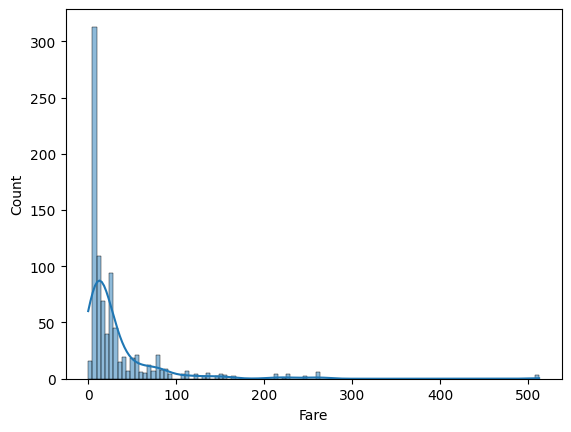

In [4]:
# Presenting the distrinution of the Fare column 
sb.histplot(df,x='Fare',kde=True)

<Axes: xlabel='Fare', ylabel='Count'>

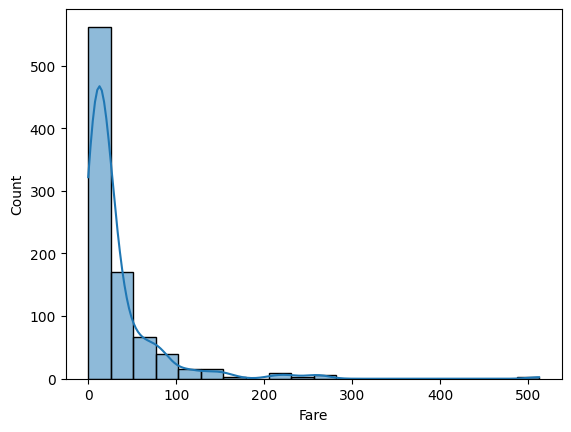

In [5]:
# Fare distribution with bins = 20 
sb.histplot(df,x='Fare',kde=True,bins=20)

Manipulation of bins help to visualize the data as per our convenience and what suits us the best

<Axes: xlabel='Fare', ylabel='Count'>

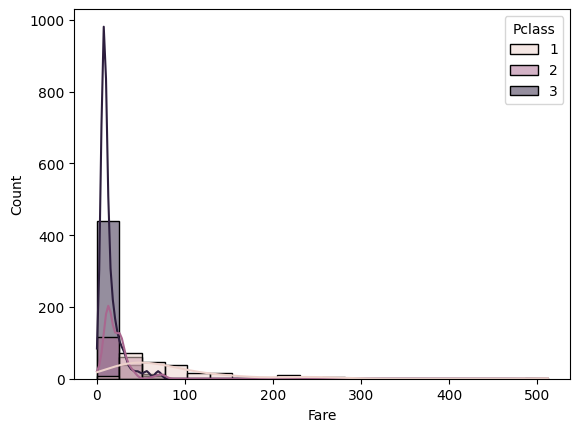

In [6]:
# Using hue to show the distribution of the Fare column based on the Pclass column 
sb.histplot(df,x='Fare',kde=True,bins=20,hue='Pclass')

Distribution of each Pclass with relation to the Fare is presented above with the help of vue 


<Axes: xlabel='age', ylabel='Count'>

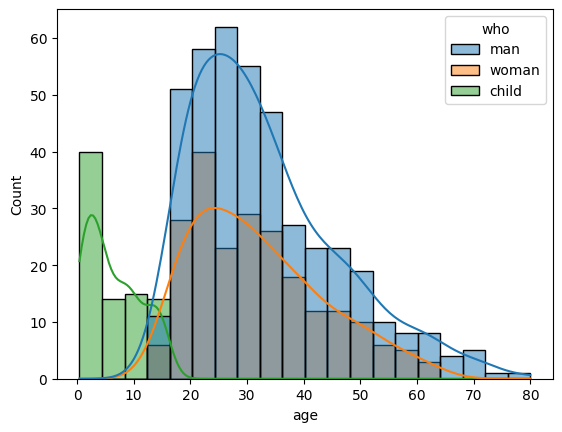

In [15]:
df_01 = sb.load_dataset('titanic') 
sb.histplot(df_01,x='age',kde=True,bins=20,hue='who')

From the above visualization we can confirm that the children data were interrupting the consistency of our data

<Axes: xlabel='age'>

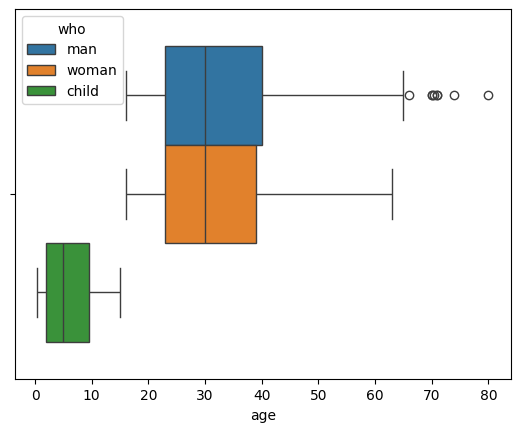

In [16]:
# showing the age distribution of the passengers based on who column with boxplot 
sb.boxplot(df_01,x='age',hue='who')

We can make the data nearly normal if we include children too in Sex column under male and female

<Axes: xlabel='Age'>

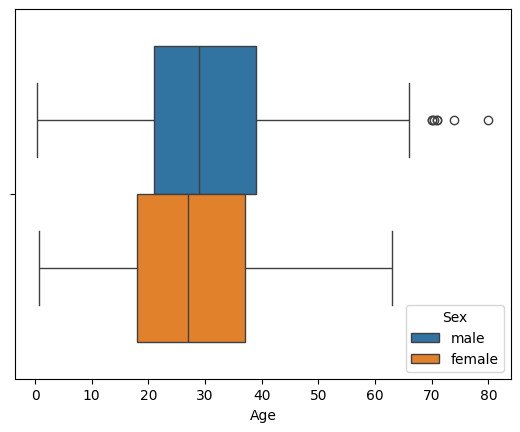

In [20]:
# boxplot of the age distribution based on the sex column 
sb.boxplot(df,x='Age',hue='Sex')

 Removal outliers from the Age column using the IQR method 

In [24]:
# Calculating the interquartile range (IQR) for the Age column
Q1 = df['Age'].quantile(0.25) 
Q3 = df['Age'].quantile(0.75) 
IQR = Q3 - Q1
float(IQR)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Outlier removal based on the IQR 
df_no_outliers = df[(df['Age']<(Q3 + 1.5 * IQR)) & (df['Age']>(Q1 - 1.5 * IQR))] 
df_no_outliers.head() # making sure that the outliers are successfully removed

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age'>

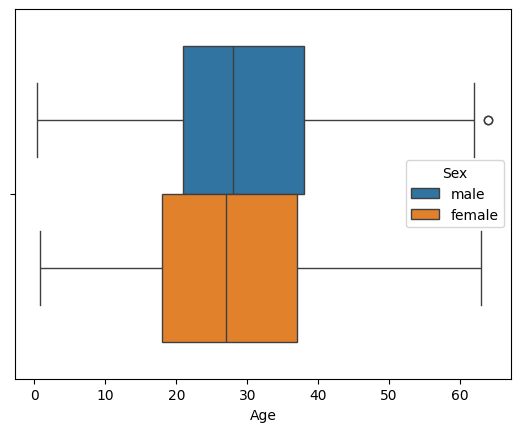

In [30]:
# Distribution of the age column after removing outliers 
sb.boxplot(df_no_outliers,x='Age',hue='Sex')

The majority of the outliers especially given by male column is successfully removed making the age data normal in terms of Sex